In [5]:
import pandas as pd

national_names = pd.read_csv(r"E:\Porivay_3_curse_1_semestr\Python\NationalNames.csv")

print(national_names.tail(8))



              Id     Name  Year Gender  Count
1825425  1825426       Zo  2014      M      5
1825426  1825427    Zyeir  2014      M      5
1825427  1825428     Zyel  2014      M      5
1825428  1825429   Zykeem  2014      M      5
1825429  1825430   Zymeer  2014      M      5
1825430  1825431  Zymiere  2014      M      5
1825431  1825432    Zyran  2014      M      5
1825432  1825433    Zyrin  2014      M      5


In [6]:

print(national_names.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825433 entries, 0 to 1825432
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Name    object
 2   Year    int64 
 3   Gender  object
 4   Count   int64 
dtypes: int64(3), object(2)
memory usage: 69.6+ MB
None


In [7]:
female_names = national_names[national_names['Gender'] == 'F']['Name'].nunique()
print(f"Кількість унікальних жіночих імен: {female_names}")

male_names = national_names[national_names['Gender'] == 'M']['Name'].nunique()
print(f"Кількість унікальних чоловічих імен: {male_names}")


Кількість унікальних жіночих імен: 64911
Кількість унікальних чоловічих імен: 39199


In [8]:
top_5_male_names_2010 = (national_names[(national_names['Year'] == 2010) & (national_names['Gender'] == 'M')]
                         .groupby('Name')['Count'].sum()
                         .sort_values(ascending=False)
                         .head(5))
print(top_5_male_names_2010)


Name
Jacob      22082
Ethan      17985
Michael    17308
Jayden     17152
William    17030
Name: Count, dtype: int64


In [9]:
min_count = national_names['Count'].min()

min_count_records = national_names[national_names['Count'] == min_count].shape[0]

print(f"Кількість записів з мінімальним значенням Count: {min_count_records}")


Кількість записів з мінімальним значенням Count: 254615


In [10]:
unique_names_per_year = national_names.groupby('Year')['Name'].nunique()

print(unique_names_per_year)


Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010    31603
2011    31418
2012    31236
2013    30774
2014    30579
Name: Name, Length: 135, dtype: int64


In [11]:
total_births_per_year = national_names.groupby('Year')['Count'].sum()

print(total_births_per_year)


Year
1880     201484
1881     192699
1882     221538
1883     216950
1884     243467
         ...   
2010    3686589
2011    3646730
2012    3643336
2013    3626802
2014    3670151
Name: Count, Length: 135, dtype: int64


In [12]:
max_birth_year = total_births_per_year.idxmax()
max_births = total_births_per_year.max()

print(f"Найбільша кількість народжень була у {max_birth_year} році: {max_births} дітей")


Найбільша кількість народжень була у 1957 році: 4200026 дітей


In [13]:
gender_count_per_year = national_names.groupby(['Year', 'Gender'])['Count'].sum().unstack()

print(gender_count_per_year)


Gender        F        M
Year                    
1880      90993   110491
1881      91954   100745
1882     107850   113688
1883     112321   104629
1884     129022   114445
...         ...      ...
2010    1772738  1913851
2011    1753500  1893230
2012    1753922  1889414
2013    1745339  1881463
2014    1768775  1901376

[135 rows x 2 columns]


In [14]:
years_more_females = gender_count_per_year[gender_count_per_year['F'] > gender_count_per_year['M']].shape[0]

print(f"Кількість років, коли народжувалося більше дівчаток: {years_more_females}")


Кількість років, коли народжувалося більше дівчаток: 54


In [15]:
neutral_names = national_names.groupby('Name')['Gender'].nunique()
gender_neutral_names_count = neutral_names[neutral_names == 2].shape[0]

print(f"Кількість гендерно-нейтральних імен: {gender_neutral_names_count}")


Кількість гендерно-нейтральних імен: 10221


In [16]:
barbara_male_count = national_names[(national_names['Name'] == 'Barbara') & (national_names['Gender'] == 'M')]['Count'].sum()

print(f"Кількість хлопчиків, названих 'Barbara': {barbara_male_count}")


Кількість хлопчиків, названих 'Barbara': 4139


In [17]:
years_of_observation = national_names['Year'].nunique()

print(f"Кількість років спостережень: {years_of_observation}")


Кількість років спостережень: 135


In [18]:
gender_neutral_names = national_names.groupby('Name')['Gender'].nunique()
popular_neutral_names = national_names[national_names['Name'].isin(gender_neutral_names[gender_neutral_names == 2].index)]
popular_neutral_names_per_year = popular_neutral_names.groupby(['Name', 'Year'])['Count'].sum().unstack().dropna()

print(popular_neutral_names_per_year)


Year       1880  1881  1882   1883   1884   1885   1886   1887   1888   1889  \
Name                                                                           
Aaron     102.0  94.0  85.0  105.0   97.0   88.0   86.0   78.0   90.0   85.0   
Abbie      71.0  81.0  80.0   79.0   98.0   88.0   84.0  109.0  137.0  107.0   
Abel        9.0  12.0  10.0   12.0   14.0    6.0   16.0   11.0    8.0    9.0   
Abigail    12.0   8.0  14.0   11.0   13.0    9.0   15.0   13.0   18.0   20.0   
Abraham    81.0  86.0  91.0   52.0   67.0   86.0   77.0   75.0   78.0   83.0   
...         ...   ...   ...    ...    ...    ...    ...    ...    ...    ...   
Wilson     72.0  73.0  82.0   67.0   78.0   59.0   71.0   52.0   62.0   44.0   
Winifred   92.0  81.0  88.0  125.0  146.0  120.0  146.0  154.0  176.0  186.0   
Winnie     49.0  84.0  74.0   67.0   99.0   80.0  134.0  114.0  143.0  162.0   
Wyatt      15.0  14.0  12.0    6.0   13.0    9.0   12.0   11.0   16.0   15.0   
Zoe        23.0  22.0  25.0   23.0   31.

In [19]:
name_year_counts = national_names.groupby('Name')['Year'].nunique()
unpopular_names = name_year_counts[name_year_counts == 1].index
popular_unpopular_name = national_names[national_names['Name'].isin(unpopular_names)].groupby('Name')['Count'].sum().idxmax()

print(f"Найпопулярніше серед непопулярних імен: {popular_unpopular_name}")


Найпопулярніше серед непопулярних імен: Christop


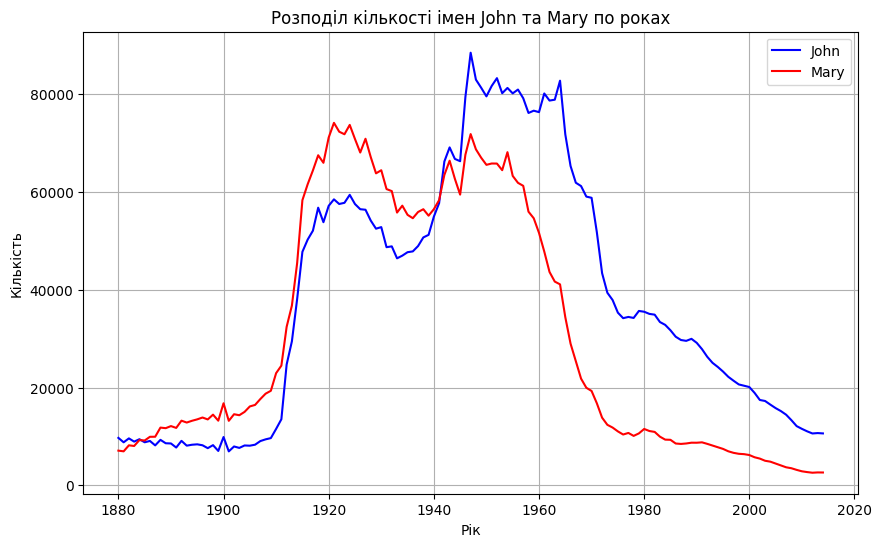

In [20]:
import matplotlib.pyplot as plt

john_data = national_names[national_names['Name'] == 'John'].groupby('Year')['Count'].sum()
mary_data = national_names[national_names['Name'] == 'Mary'].groupby('Year')['Count'].sum()

plt.figure(figsize=(10, 6))
plt.plot(john_data.index, john_data.values, label='John', color='blue')
plt.plot(mary_data.index, mary_data.values, label='Mary', color='red')
plt.title('Розподіл кількості імен John та Mary по роках')
plt.xlabel('Рік')
plt.ylabel('Кількість')
plt.legend()
plt.grid(True)
plt.savefig('john_mary_distribution.png')
plt.show()


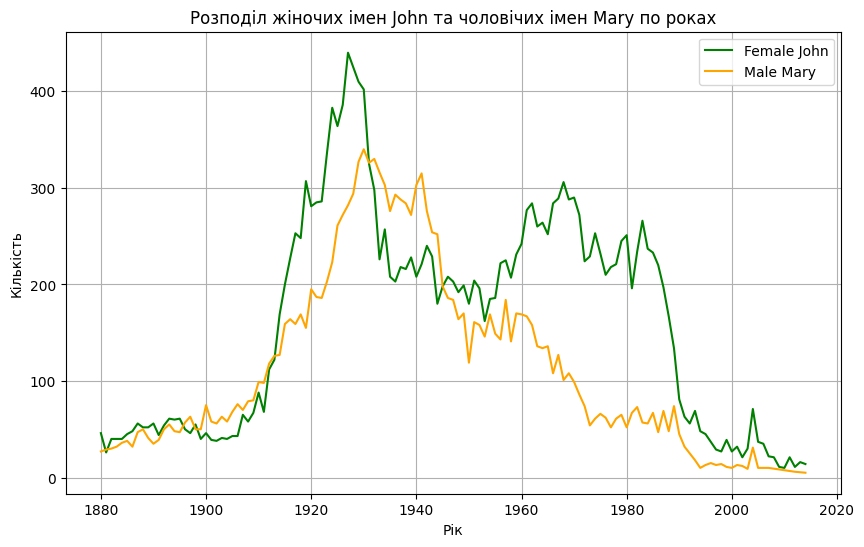

In [21]:
female_john = national_names[(national_names['Name'] == 'John') & (national_names['Gender'] == 'F')].groupby('Year')['Count'].sum()
male_mary = national_names[(national_names['Name'] == 'Mary') & (national_names['Gender'] == 'M')].groupby('Year')['Count'].sum()

plt.figure(figsize=(10, 6))
plt.plot(female_john.index, female_john.values, label='Female John', color='green')
plt.plot(male_mary.index, male_mary.values, label='Male Mary', color='orange')
plt.title('Розподіл жіночих імен John та чоловічих імен Mary по роках')
plt.xlabel('Рік')
plt.ylabel('Кількість')
plt.legend()
plt.grid(True)
plt.savefig('female_john_male_mary_distribution.png')
plt.show()


In [22]:
most_popular_names_per_year = national_names.loc[national_names.groupby('Year')['Count'].idxmax()]

print(most_popular_names_per_year[['Year', 'Name', 'Count']])


         Year      Name  Count
942      1880      John   9655
2938     1881      John   8769
4963     1882      John   9557
7116     1883      John   8894
9318     1884      John   9388
...       ...       ...    ...
1657592  2010  Isabella  22883
1691633  2011    Sophia  21816
1725502  2012    Sophia  22267
1759186  2013    Sophia  21147
1792389  2014      Emma  20799

[135 rows x 3 columns]
